<ipython-input-2-eeb2a75d12d3>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2015-01-01', periods=120, freq='M')


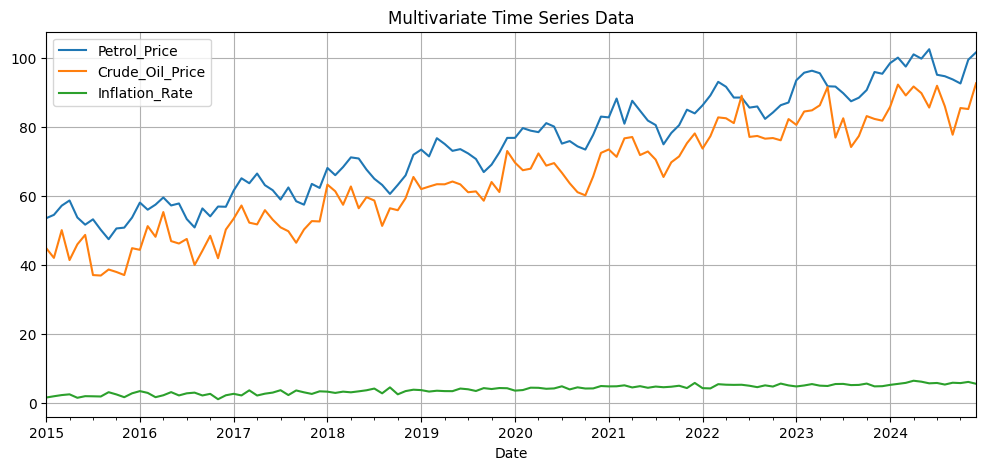

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


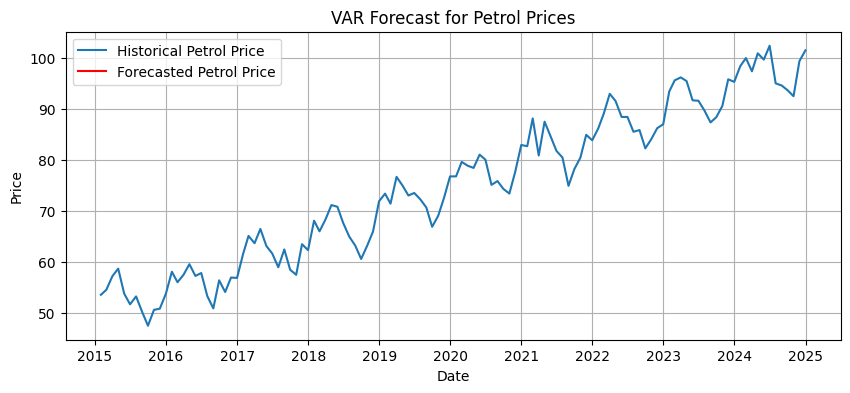

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Step 1: Generate synthetic multivariate time series data
np.random.seed(42)
dates = pd.date_range(start='2015-01-01', periods=120, freq='M')

# Simulate components
petrol_trend = np.linspace(50, 100, 120)
oil_trend = np.linspace(40, 90, 120)
inflation_trend = np.linspace(2, 6, 120)

seasonal = 5 * np.sin(2 * np.pi * dates.month / 12)
noise = np.random.normal(0, 2, 120)

# Create data
data = pd.DataFrame({
    'Date': dates,
    'Petrol_Price': petrol_trend + seasonal + noise,
    'Crude_Oil_Price': oil_trend + seasonal + np.random.normal(0, 3, 120),
    'Inflation_Rate': inflation_trend + np.random.normal(0, 0.5, 120)
})
data.set_index('Date', inplace=True)

# Step 2: Plot the multivariate time series
data.plot(figsize=(12, 5), title="Multivariate Time Series Data")
plt.grid(True)
plt.show()

# Step 3: Check stationarity by differencing (you can use ADF test for real datasets)
diff_data = data.diff().dropna()

# Step 4: Fit VAR model
model = VAR(diff_data)
lag_order = model.select_order(maxlags=12).selected_orders['aic']
model_fitted = model.fit(lag_order)

# Step 5: Forecast next 12 months
forecast_input = diff_data.values[-lag_order:]
forecast_diff = model_fitted.forecast(y=forecast_input, steps=12)

# Step 6: Convert differenced forecast to original scale
forecast_diff_df = pd.DataFrame(forecast_diff, columns=diff_data.columns)
forecast_df = data.iloc[-1:] + forecast_diff_df.cumsum()

# Step 7: Plot forecasted Petrol Prices
plt.figure(figsize=(10, 4))
plt.plot(data['Petrol_Price'], label='Historical Petrol Price')
plt.plot(forecast_df['Petrol_Price'], label='Forecasted Petrol Price', color='red')
plt.title("VAR Forecast for Petrol Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
